In [131]:
import pandas as pd
import numpy as np
import seaborn as sms
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
df = pd.read_csv('911.csv')

In [119]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
423904,40.139993,-75.049864,BUCK RD & WOODWARD DR; LOWER MORELAND; 2018-11...,19006.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:08,LOWER MORELAND,BUCK RD & WOODWARD DR,1
423905,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:53:32,LOWER SALFORD,OAK DR & MOYER RD,1
423906,40.270121,-75.382825,OAK DR & MOYER RD; LOWER SALFORD; 2018-11-16 @...,19438.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:54:19,LOWER SALFORD,OAK DR & MOYER RD,1
423907,40.190946,-75.237285,SUMNEYTOWN PIKE & WELLINGTON DR; LOWER GWYNEDD...,19002.0,Traffic: VEHICLE ACCIDENT -,2018-11-16 08:51:48,LOWER GWYNEDD,SUMNEYTOWN PIKE & WELLINGTON DR,1


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [121]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [122]:
df['zip'].value_counts().head()

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [123]:
df['twp'].value_counts().head()

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [124]:
arr = df['title']

ems = 0
fire = 0
traffic = 0
for i in arr:
    split = i.split(":")
#     print(split[0])
    if split[0] == "EMS":
        ems +=1 
    elif split[0] == "Fire":
        fire += 1
    elif split[0] == "Traffic":
        traffic += 1
        
print('EMS:', ems)
print('Fire:', fire)
print('Traffic:',traffic)

EMS: 208676
Fire: 63775
Traffic: 151458


In [125]:
x = df['title'].iloc[0]

In [126]:
x.split(":")[0]

'EMS'

In [127]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [128]:
df['Reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

In [129]:
df['Reason'].value_counts().head(1)

EMS    208676
Name: Reason, dtype: int64

In [134]:
df['Reason'].value_counts().head(3)

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

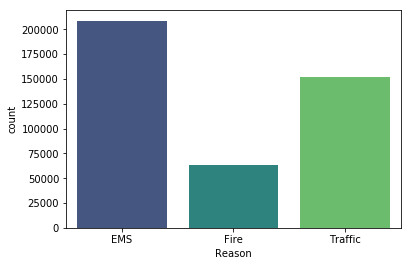

In [132]:
sms.countplot(x='Reason' , data = df, palette = 'viridis')

In [135]:
df['Reason'].value_counts().head(2)

EMS        208676
Traffic    151458
Name: Reason, dtype: int64

In [136]:
df['Reason'].value_counts().head(3)

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64